<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/Statisticeday4_27_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.api as sm

## 산점도 그리기 & 상관 계수

In [ ]:
# 가상 데이터셋 생성
np.random.seed(42)  # 동일한 결과를 얻기 위한 시드 설정
data = {
    'House_Size_sqm': np.random.randint(50, 200, 100),
    'Num_Bedrooms': np.random.randint(1, 6, 100),
    'Years_Old': np.random.randint(0, 30, 100)
}
df = pd.DataFrame(data)

# 'Price' 변수를 다른 변수들에 기반하여 약간의 노이즈를 추가해 생성
df['Price_in_USD'] = (df['House_Size_sqm'] * 5000 + df['Num_Bedrooms'] * 10000 - df['Years_Old'] * 2000 + np.random.randn(100) * 20000)
df['Price_in_USD'] = df['Price_in_USD'].astype(int).clip(lower=50000)

df.head()


,House_Size_sqm,Num_Bedrooms,Years_Old,Price_in_USD
0,152,3,19,724602
1,142,3,27,670564
2,64,1,26,295573
3,156,3,3,799208
4,121,5,18,643187


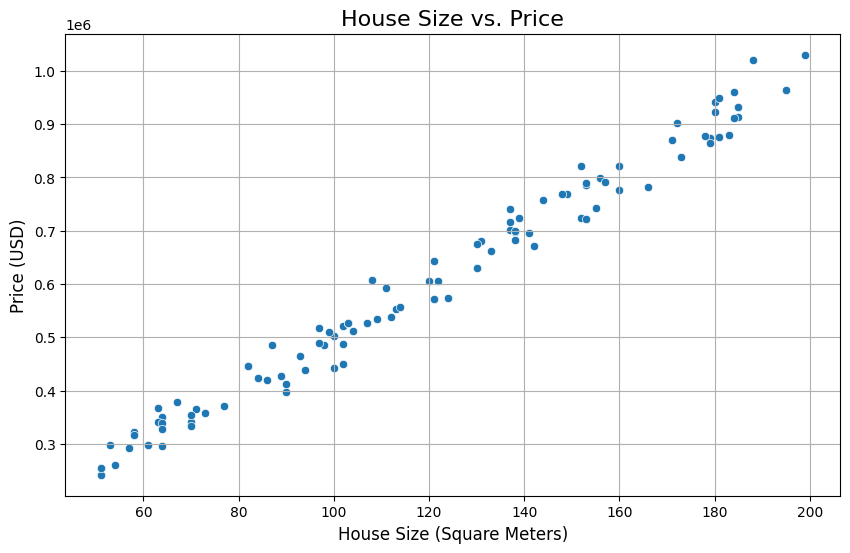

In [ ]:
# 주택 크기와 주택 가격 간의 관계를 보여주는 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='House_Size_sqm', y='Price_in_USD', data=df)
plt.title('House Size vs. Price', fontsize=16)
plt.xlabel('House Size (Square Meters)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)

plt.show()

In [ ]:
# 주택 크기와 주택 가격 간의 상관관계 계산하기

r, p = stats.pearsonr(df['House_Size_sqm'], df['Price_in_USD'])

print(f'상관계수: {r:.3f}')
print(f'p값: {p:.3f}')

상관계수: 0.990
p값: 0.000


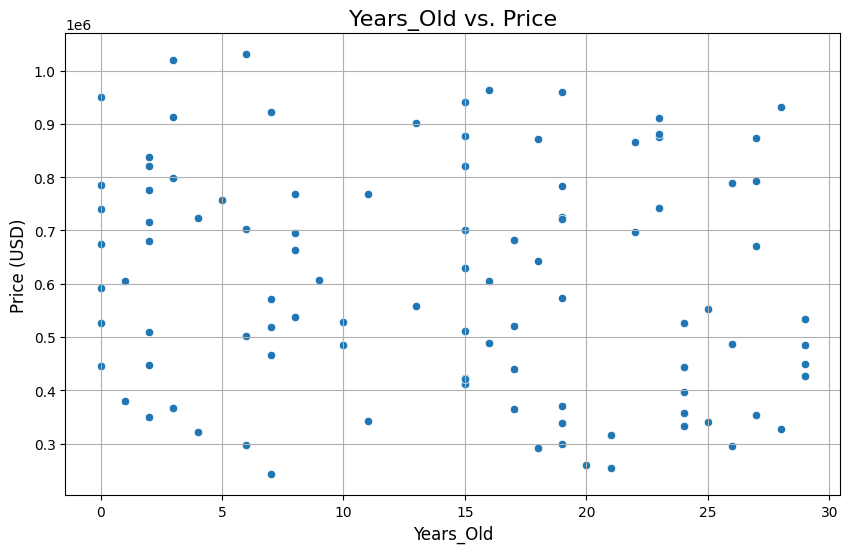

In [ ]:
# 주택 연식과 주택 가격 간의 관계를 보여주는 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_Old', y='Price_in_USD', data=df)
plt.title('Years_Old vs. Price', fontsize=16)
plt.xlabel('Years_Old', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)

plt.show()

In [ ]:
# 주택 연식과 주택 가격 간의 상관관계 계산하기

r, p = stats.pearsonr(df['Years_Old'], df['Price_in_USD'])

print(f'상관계수: {r:.3f}')
print(f'p값: {p:.3f}')

상관계수: -0.151
p값: 0.133


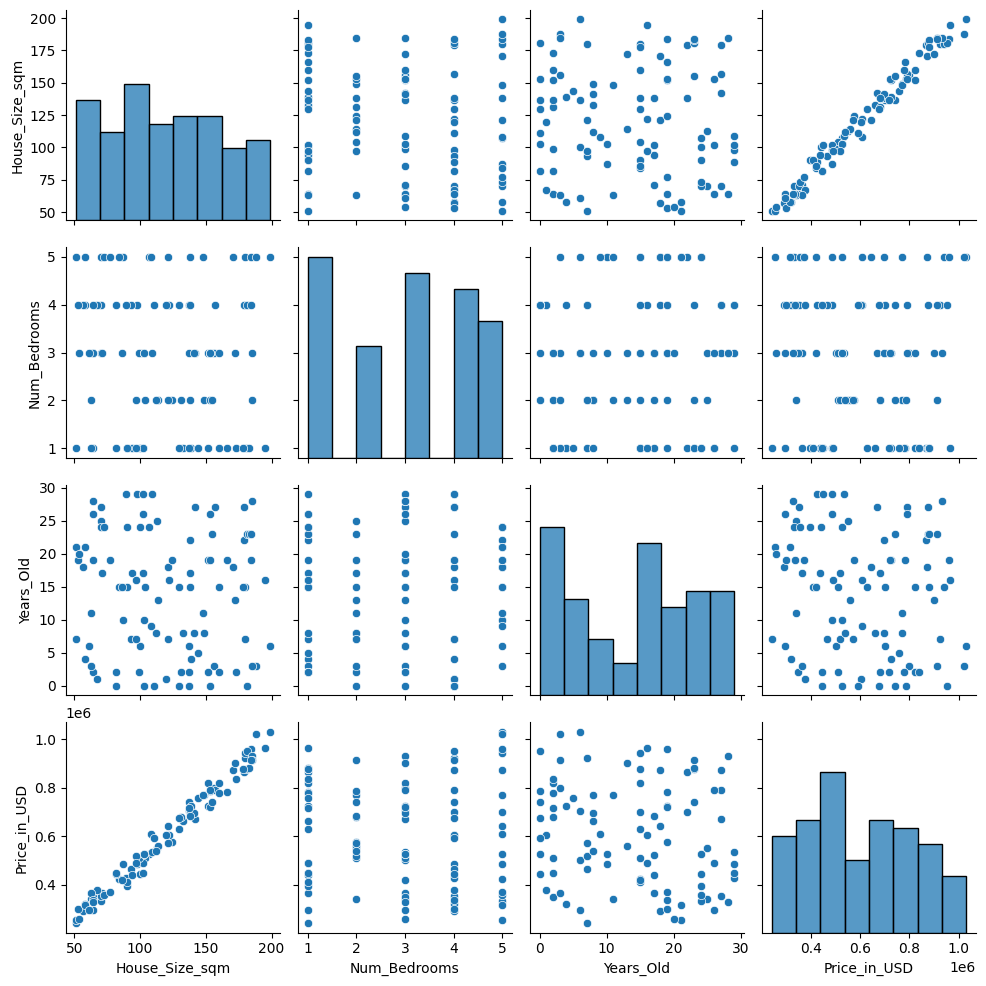

In [ ]:
# pairplot을 통해 양적 변수 간의 산점도 그리
sns.pairplot(data=df)
plt.show()

In [ ]:
# 상관계수 행렬 계산하기
correlation_matrix = df.corr()
correlation_matrix

,House_Size_sqm,Num_Bedrooms,Years_Old,Price_in_USD
House_Size_sqm,1.000000,-0.099231,-0.078104,0.990408
Num_Bedrooms,-0.099231,1.000000,0.077170,-0.038963
Years_Old,-0.078104,0.077170,1.000000,-0.151354
Price_in_USD,0.990408,-0.038963,-0.151354,1.000000


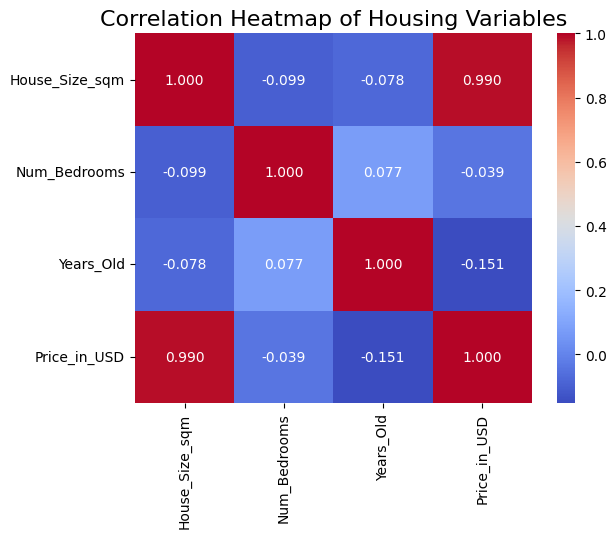

In [ ]:
# 상관계수 히트맵으로 시각화하기

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap of Housing Variables', fontsize=16)

plt.show()

## 피어슨 상관계수와 스피어만 상관계수

In [ ]:
from scipy.stats import pearsonr, spearmanr

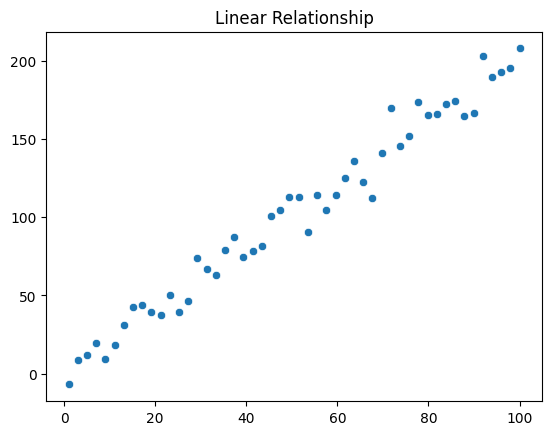


선형 관계일 때 상관계수
피어슨 상관계수: 0.987, p-value:0.000
스피어만 상관계수: 0.984, p-value:0.000


In [ ]:
# 시나리오 1: 완벽한 선형 관계
x1 = np.linspace(1, 100, 50)
y1 = x1 * 2 + np.random.normal(0, 10, 50)

# 상관계수 구하기
pearson1, p_pearson1 = pearsonr(x1, y1)
spearman1, p_spearman1 = spearmanr(x1, y1)

plt.figure()
sns.scatterplot(x = x1, y = y1)
plt.title('Linear Relationship')

plt.show()

print()
print('선형 관계일 때 상관계수')
print(f'피어슨 상관계수: {pearson1:.3f}, p-value:{p_pearson1:.3f}')
print(f'스피어만 상관계수: {spearman1:.3f}, p-value:{p_spearman1:.3f}')

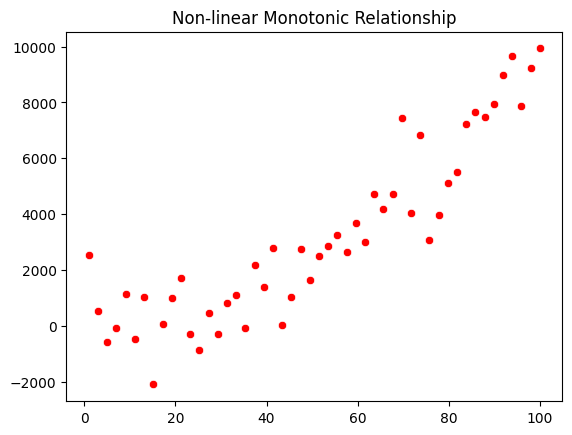


비선형 단조 관계일 때 상관계수
피어슨 상관계수: 0.896, p-value:0.000
스피어만 상관계수: 0.906, p-value:0.000


In [ ]:
# 시나리오 2: 비선형이지만 단조 관계 (곡선 형태)
x2 = np.linspace(1, 100, 50)
y2 = x2**2 + np.random.normal(0, 1000, 50)

pearson2, p_pearson2 = pearsonr(x2, y2)
spearman2, p_spearman2 = spearmanr(x2, y2)

plt.figure()
sns.scatterplot(x = x2, y = y2, color='red')
plt.title('Non-linear Monotonic Relationship')

plt.show()

print()
print('비선형 단조 관계일 때 상관계수')
print(f'피어슨 상관계수: {pearson2:.3f}, p-value:{p_pearson2:.3f}')
print(f'스피어만 상관계수: {spearman2:.3f}, p-value:{p_spearman2:.3f}')

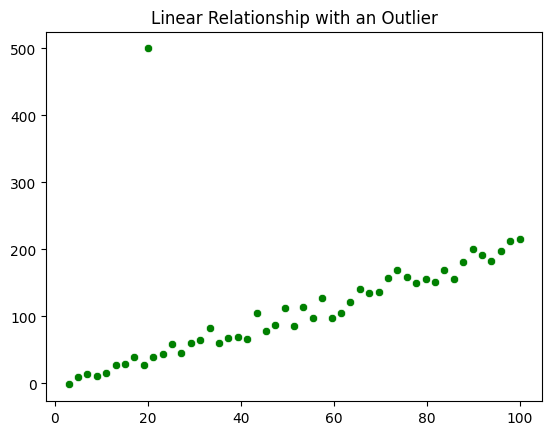


이상치가 있는 선형 관계일 때 상관계수
피어슨 상관계수: 0.609, p-value:0.000
스피어만 상관계수: 0.907, p-value:0.000


In [ ]:
# 시나리오 3: 선형 관계에 이상치(Outlier) 추가
x3 = np.linspace(1, 100, 50)
y3 = x3 * 2 + np.random.normal(0, 10, 50)
# 이상치 추가
y3[0] = 500
x3[0] = 20


pearson3, p_pearson3 = pearsonr(x3, y3)
spearman3, p_spearman3 = spearmanr(x3, y3)

plt.figure()
sns.scatterplot(x = x3, y = y3, color='green')
plt.title('Linear Relationship with an Outlier')

plt.show()

print()
print('이상치가 있는 선형 관계일 때 상관계수')
print(f'피어슨 상관계수: {pearson3:.3f}, p-value:{p_pearson3:.3f}')
print(f'스피어만 상관계수: {spearman3:.3f}, p-value:{p_spearman3:.3f}')

## 단순선형회귀 분석하기

In [ ]:
# 데이터셋 생성하기

np.random.seed(42)
X = 2.5 * np.random.randn(100) + 1.5   # 독립 변수 (X)
res = 0.5 * np.random.randn(100)       # 오차항
y = 2 + 0.3 * X + res                  # 종속 변수 (Y)

df = pd.DataFrame({'X': X, 'y': y})

### 최소제곱법
직접 최소제곱법으로 파라미터를 연산해서 찾을 수 있습니다. 최소제곱법으로 기울기와 절편식을 유도하는 과정은 다음 블로그를 참고해보세요.  

$$b_1 = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$$  
$$b_0 = \bar{y}-b_1\bar{x}$$  

[에라이, 일단 레츠 두 잇, 회귀분석 - OLS Regression 손으로 풀어보기](https://recipesds.tistory.com/entry/%EC%97%90%EB%9D%BC%EC%9D%B4-%EC%9D%BC%EB%8B%A8-%EB%A0%88%EC%B8%A0-%EB%91%90-%EC%9E%87-%ED%9A%8C%EA%B8%B0-%EB%B6%84-%EC%84%9D-OLS-Regression)

In [ ]:
# 직접 최소제곱법으로 파라미터 찾기
x_mean = np.mean(X)
y_mean = np.mean(y)

beta_1_manual = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)
beta_0_manual = y_mean - beta_1_manual * x_mean

print("--- 방법 1: 직접 OLS 계산 결과 ---")
print(f"기울기 (beta_1): {beta_1_manual:.4f}")
print(f"Y절편 (beta_0): {beta_0_manual:.4f}")

--- 방법 1: 직접 OLS 계산 결과 ---
기울기 (beta_1): 0.2713
Y절편 (beta_0): 2.0467


### scikit-learn LinearRegression
[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# scikit-learn 패키지 활용해서 파라미터 찾기
from sklearn.linear_model import LinearRegression

# Scikit-learn은 2D 배열을 입력으로 요구하므로 X를 변환
X_reshaped = X.reshape(-1, 1)

sklearn_model = LinearRegression()
sklearn_model.fit(X_reshaped, y)

beta_1_sklearn = sklearn_model.coef_[0]
beta_0_sklearn = sklearn_model.intercept_

print("--- 방법 2: Scikit-learn 활용 결과 ---")
print(f"기울기 (beta_1): {beta_1_sklearn:.4f}")
print(f"Y절편 (beta_0): {beta_0_sklearn:.4f}")

--- 방법 2: Scikit-learn 활용 결과 ---
기울기 (beta_1): 0.2713
Y절편 (beta_0): 2.0467


### statsmodels OLS
[statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)

In [ ]:
# Statsmodels 패키지 활용해서 파라미터 찾기
import statsmodels.api as sm

# Statsmodels는 절편(intercept)을 위해 상수항을 직접 추가해야 함
X_sm = sm.add_constant(X)

stats_model = sm.OLS(y, X_sm)
results = stats_model.fit()

beta_0_stats, beta_1_stats = results.params

print("--- 방법 3: Statsmodels OLS 활용 결과 ---")
print(f"기울기 (beta_1): {beta_1_stats:.4f}")
print(f"Y절편 (beta_0): {beta_0_stats:.4f}")

--- 방법 3: Statsmodels OLS 활용 결과 ---
기울기 (beta_1): 0.2713
Y절편 (beta_0): 2.0467


In [ ]:
print("\n[Statsmodels OLS 요약 리포트]")
print(results.summary())


[Statsmodels OLS 요약 리포트]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     166.7
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           7.22e-23
Time:                        15:45:35   Log-Likelihood:                -66.393
No. Observations:                 100   AIC:                             136.8
Df Residuals:                      98   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0467     

### 회귀 결과, 신뢰 구간, 예측 구간 시각화하기

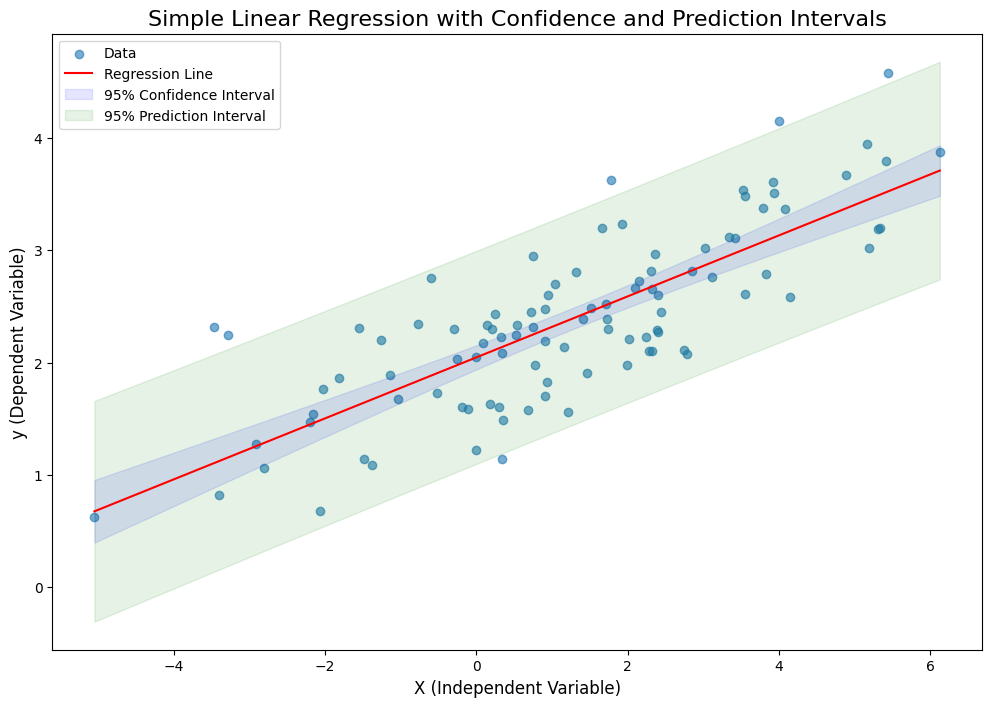

In [ ]:
# 예측에 사용할 새로운 X값들 (그래프를 부드럽게 그리기 위함)
X_new = np.linspace(X.min(), X.max(), 100)
X_new_sm = sm.add_constant(X_new)

# 예측 결과 및 구간 계산
pred = results.get_prediction(X_new_sm)
pred_summary = pred.summary_frame(alpha=0.05)

# 시각화
plt.figure(figsize=(12, 8))

# 원본 데이터 산점도
plt.scatter(X, y, label='Data', alpha=0.6)

# 회귀선
plt.plot(X_new, pred_summary['mean'], color='red', label='Regression Line')

# 95% 신뢰구간 (Confidence Interval)
plt.fill_between(
    X_new,
    pred_summary['mean_ci_lower'],
    pred_summary['mean_ci_upper'],
    color='blue',
    alpha=0.1,
    label='95% Confidence Interval'
)

# 95% 예측구간 (Prediction Interval)
plt.fill_between(
    X_new,
    pred_summary['obs_ci_lower'],
    pred_summary['obs_ci_upper'],
    color='green',
    alpha=0.1,
    label='95% Prediction Interval'
)

plt.title('Simple Linear Regression with Confidence and Prediction Intervals', fontsize=16)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend()
plt.savefig('linear_regression_intervals.png')
plt.show()

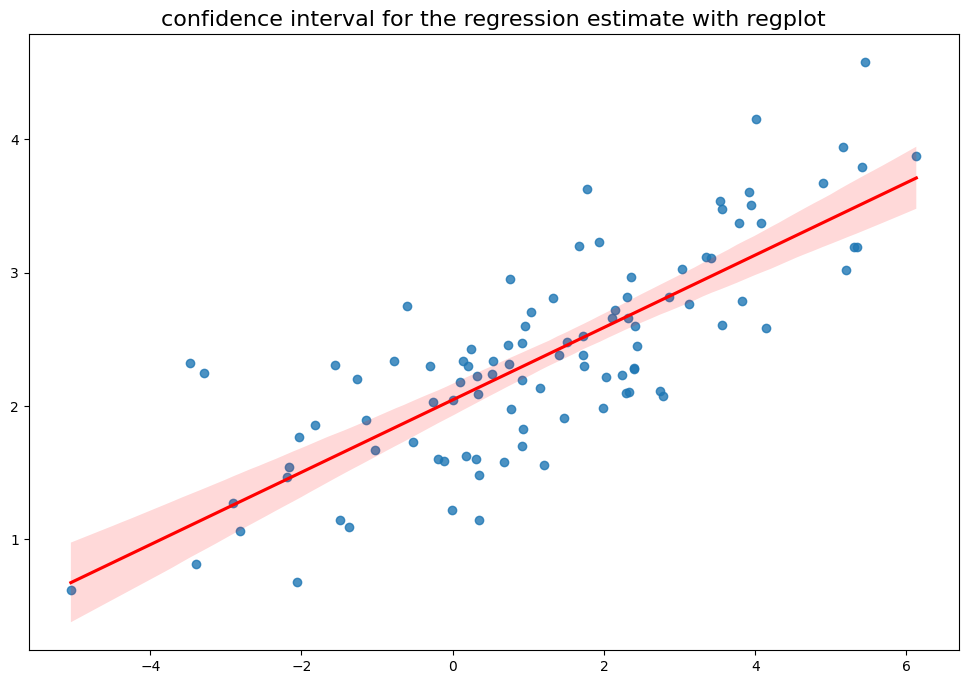

In [ ]:
# seaborn의 regplot을 사용하면 회귀직선의 (부트스트랩을 통한) 신뢰구간을 간단하게 표현할 수 있습니다

plt.figure(figsize=(12, 8))

sns.regplot(x=X, y=y, line_kws={'color':'red'})
plt.title('confidence interval for the regression estimate with regplot', fontsize=16)

plt.show()

## 결정계수

In [ ]:
# scikit-leanr을 활용한 결정계수 구하기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_reshaped = X.reshape(-1, 1)

sklearn_model = LinearRegression()
sklearn_model.fit(X_reshaped, y)

y_pred = sklearn_model.predict(X_reshaped)

print(sklearn_model.score(X_reshaped, y))
print(r2_score(y, y_pred))

0.6297598193059208
0.6297598193059208


In [ ]:
# 결정계수 비교하기

# 데이터 생성

np.random.seed(42)
# 1. 결정계수가 높은 경우의 데이터 생성
X_high = np.arange(1, 101).reshape(-1, 1)
# y = 2x + 5 의 관계를 가지지만, 약간의 노이즈 추가
y_high = 2 * X_high.flatten() + 5 + np.random.normal(0, 15, 100)

# 2. 결정계수가 낮은 경우의 데이터 생성
X_low = np.arange(1, 101).reshape(-1, 1)
# 뚜렷한 관계가 없도록 노이즈를 크게 추가
y_low = 0.5 * X_low.flatten() + 10 + np.random.normal(0, 50, 100)

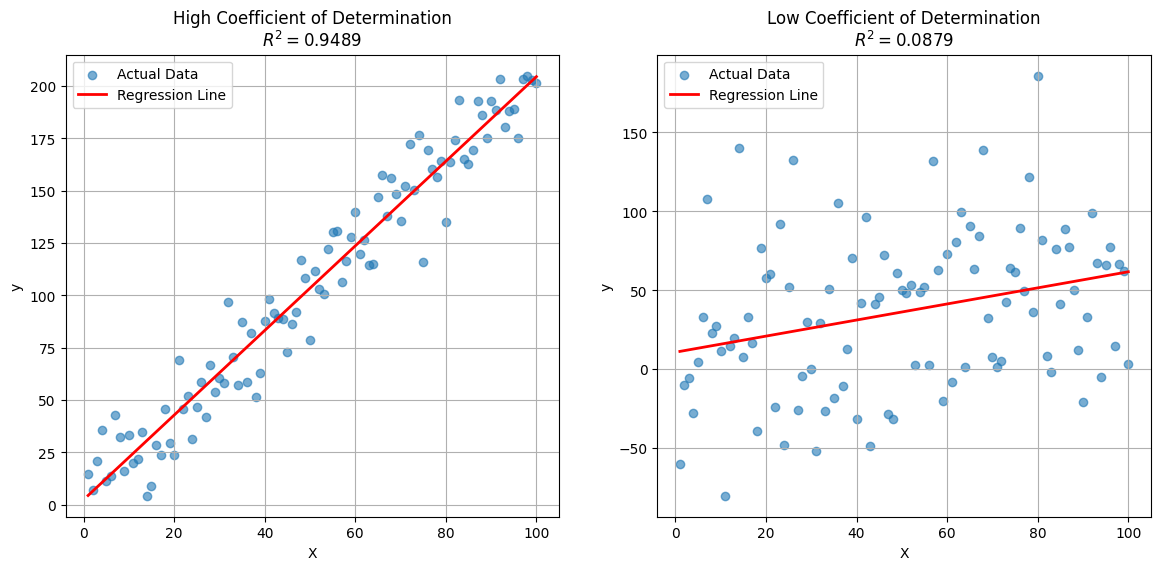

In [ ]:
# 모델 학습 및 결정계수 계산 함수
def plot_regression(X, y, ax, title):
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)

    ax.scatter(X, y, alpha=0.6, label='Actual Data')
    ax.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
    ax.set_title(f'{title}\n$R^2 = {r_squared:.4f}$')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)

# 3. 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_regression(X_high, y_high, ax1, 'High Coefficient of Determination')
plot_regression(X_low, y_low, ax2, 'Low Coefficient of Determination')

plt.show()

## 다중선형회귀


In [ ]:
import statsmodels.api as sm

In [ ]:
# 데이터 생성
np.random.seed(42)
data = {
    'House_Size_sqm': np.random.randint(50, 200, 100),
    'Num_Bedrooms': np.random.randint(1, 6, 100),
    'Years_Old': np.random.randint(0, 30, 100)
}
df = pd.DataFrame(data)

df['Price_in_USD'] = (df['House_Size_sqm'] * 5000 + df['Num_Bedrooms'] * 10000 - df['Years_Old'] * 2000 + np.random.randn(100) * 20000)
df['Price_in_USD'] = df['Price_in_USD'].astype(int).clip(lower=50000)

In [ ]:
X = df[['House_Size_sqm', 'Num_Bedrooms', 'Years_Old']]
X = sm.add_constant(X) # 상수항 추가
y = df['Price_in_USD']

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_in_USD   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3386.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.33e-97
Time:                        16:42:44   Log-Likelihood:                -1134.7
No. Observations:                 100   AIC:                             2277.
Df Residuals:                      96   BIC:                             2288.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            482.8909   8679.466      0.

In [ ]:
model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)

print(f"절편 (Intercept): {model.intercept_:.4f}")
print(f"결정계수 (R-squared): {r_squared:.4f}\n")

coef_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("--- 회귀계수 ---")
coef_df

절편 (Intercept): 482.8909
결정계수 (R-squared): 0.9906

--- 회귀계수 ---


,Coefficient
const,0.000000
House_Size_sqm,5007.736604
Num_Bedrooms,9751.687773
Years_Old,-1828.833427


## 더미 변수

In [ ]:
# 데이터 생성
data = {'price': [3000, 3200, 2500, 5000, 5500, 4800, 7000, 7200, 6500],
        'year': [2018, 2017, 2018, 2021, 2022, 2021, 2023, 2022, 2023],
        'brand': ['A사', 'A사', 'A사', 'B사', 'B사', 'B사', 'C사', 'C사', 'C사']}
df = pd.DataFrame(data)
df

,price,year,brand
0,3000,2018,A사
1,3200,2017,A사
2,2500,2018,A사
3,5000,2021,B사
4,5500,2022,B사
5,4800,2021,B사
6,7000,2023,C사
7,7200,2022,C사
8,6500,2023,C사


In [ ]:
# 범주형 변수 'brand'를 더미 변수로 변환
dummies = pd.get_dummies(df['brand'], prefix='brand', drop_first=True)
df_reg = pd.concat([df, dummies], axis=1)
df_reg = df_reg.drop('brand', axis=1)
df_reg

,price,year,brand_B사,brand_C사
0,3000,2018,False,False
1,3200,2017,False,False
2,2500,2018,False,False
3,5000,2021,True,False
4,5500,2022,True,False
5,4800,2021,True,False
6,7000,2023,False,True
7,7200,2022,False,True
8,6500,2023,False,True


In [ ]:
X = df_reg[['year', 'brand_B사', 'brand_C사']]
y = df_reg['price']

model = LinearRegression()
model.fit(X, y)

print(f"회귀계수 (Coefficients): {model.coef_}")
print(f"절편 (Intercept): {model.intercept_:.4f}")
print(f"결정계수 (R-squared): {model.score(X, y):.4f}\n")

회귀계수 (Coefficients): [-100.         2566.66666667 4500.        ]
절편 (Intercept): 204666.6667
결정계수 (R-squared): 0.9694



In [ ]:
coef_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("--- 회귀계수 ---")
coef_df

--- 회귀계수 ---


,Coefficient
year,-100.000000
brand_B사,2566.666667
brand_C사,4500.000000


## 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# 데이터 생성
data = {'study_hours': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
        'passed':      [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)

In [ ]:
X = df[['study_hours']]
y = df['passed']

model = LogisticRegression()
model.fit(X, y)

print(f"회귀계수 (Coefficient): {model.coef_[0][0]:.4f}")
print(f"절편 (Intercept): {model.intercept_[0]:.4f}\n")

회귀계수 (Coefficient): 1.3329
절편 (Intercept): -6.3269



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


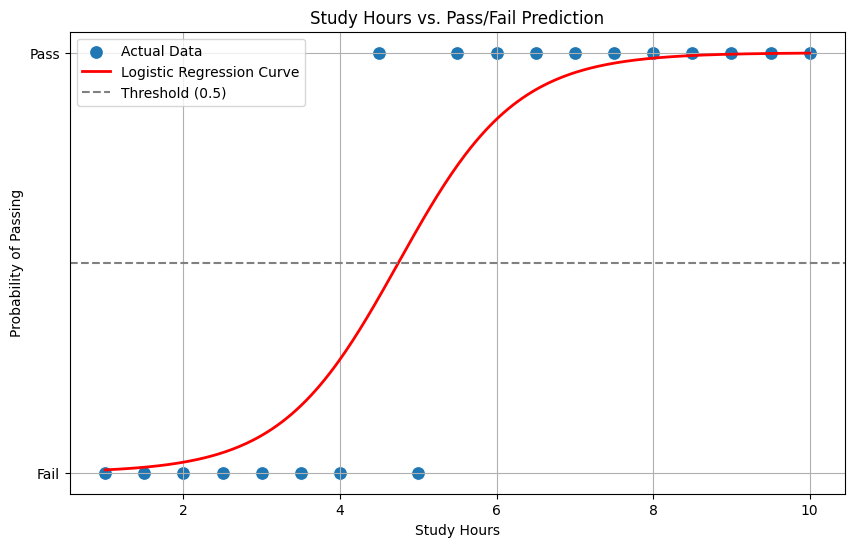

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='passed', data=df, s=100, label='Actual Data')

x_values = np.linspace(df['study_hours'].min(), df['study_hours'].max(), 300).reshape(-1, 1)
y_probs = model.predict_proba(x_values)[:, 1]

plt.plot(x_values, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')
plt.axhline(y=0.5, color='grey', linestyle='--', label='Threshold (0.5)') # 결정 경계
plt.title('Study Hours vs. Pass/Fail Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.legend()
plt.grid(True)
plt.show()

### 로지스틱 회귀 함수의 해석

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
# 데이터 생성
#  특정 학생이 공부한 시간(hours)을 바탕으로 시험 합격 여부(pass)를 예측하는 가상의 데이터
data = {
    'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0: 불합격, 1: 합격
}
df = pd.DataFrame(data)

X = df[['hours']]  # 독립 변수 (공부 시간)
y = df['pass'] # 종속 변수 (합격 여부)

In [ ]:
# 로지스틱 회귀 모델 학습 (Logit 사용)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.515951
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                   10
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            0
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2334
Time:                        00:39:49   Log-Likelihood:                -5.1595
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hours          0.2289      0.145      1.582      0.114      -0.055       0.512


In [ ]:
# 오즈비 계산 및 해석
# 회귀계수(coef)에 자연상수(exp)를 취해 오즈비를 계산합니다.
odds_ratios = pd.DataFrame(
    {
        'Odds Ratio': np.exp(result.params),
        'p-value': result.pvalues,
    }
)

odds_ratios

,Odds Ratio,p-value
hours,1.257262,0.113559


오즈비가 1.26. 공부 시간이 1시간 늘어날 때마다 시험에 합격할 오즈가 1.26배 증가함을 의미